In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

In [3]:
caffe.set_mode_gpu()

model_def = '/home/nd/caffe_set/caffe-moon/examples/moon_tiny/deploy.prototxt'
model_weights = '/home/nd/caffe_set/caffe-moon/examples/moon_tiny/models/moon_tiny_iter_1000000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [4]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
#transformer.set_mean('data', mean)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

Average error 10.4547390041%


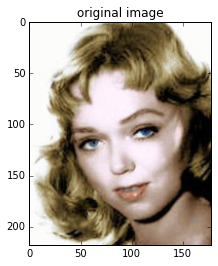

In [6]:
test_file = '/data/celeba_dababase/moon_paper/test.txt'
lines = []

net.blobs['data'].reshape(1,        # batch size
                          3,         # 3-channel (BGR) images
                          218, 178)  # image size is 227x227
with open(test_file, 'r') as fin:
    lines = fin.readlines()
    
total_error = 0
count = len(lines)

for line in lines:
    name_attr = line.strip().replace('  ', ' ').split(' ')
    path = '/data' + name_attr[0]
    attr = [int(a) for a in name_attr[1:]]
    
    # load image and prepare as a single input batch for Caffe
    im = np.array(caffe.io.load_image(path, color=True)).squeeze()
    transformed_image = transformer.preprocess('data', im)
    net.blobs['data'].data[...] = transformed_image*0.003922
    output = net.forward()
    out = np.sign(output['moon-fc'][0])
    #print attr
    res = attr - out
    #print res
    total_error += int(0.5*np.sum(np.abs(res)))

    #print im.shape
    plt.title("original image")
    plt.imshow(im)
    plt.axis('on')

    #im_input = im[np.newaxis, np.newaxis, :, :]
    #net.blobs['data'].reshape(*im_input.shape)
    #net.blobs['data'].data[...] = im_input
print ('Average error {}%'.format( 100.0 * total_error/(count * 40)))

In [48]:
0.000146161532411 * 160000 * 40/4000

0.2338584518576